# Introduction


* Industri perbankan saat ini menghadapi tantangan yang signifikan dalam mempertahankan pelanggan dan menghadapi persaingan yang ketat. Keberhasilan dalam memahami perilaku pelanggan dan memprediksi pelanggan yang berpotensi berhenti berlangganan layanan, yang dikenal sebagai "churn," sangat penting.

  Dalam kasus ini kami dari team ***Insight Seeker***  membuat sebuah Projek ***Bank Customer Churn Prediction***. Projek ini bertujuan untuk mengungkap faktor-faktor yang memengaruhi keputusan pelanggan untuk tetap menggunakan layanan bank atau beralih ke penyedia lain. Kami akan menggunakan nilai "churn" sebagai indikator utama keberhasilan

  Dengan demikian, proyek ini bertujuan untuk memberikan wawasan komprehensif tentang perilaku pelanggan dalam industri perbankan dan bagaimana faktor-faktor tertentu dapat berkontribusi pada keberhasilan mereka dalam berlangganan layanan bank. Hasil analisis ini diharapkan akan membantu bank mengembangkan strategi retensi pelanggan yang lebih efektif dan meningkatkan pengalaman pelanggan secara keseluruhan.

**Tujuan Analisa**

* Dengan demikian, proyek ini bertujuan untuk memberikan wawasan komprehensif tentang perilaku pelanggan dalam industri perbankan dan bagaimana faktor-faktor tertentu dapat berkontribusi pada keberhasilan mereka dalam berlangganan layanan bank. Hasil analisis ini diharapkan akan membantu bank mengembangkan strategi retensi pelanggan yang lebih efektif dan meningkatkan pengalaman pelanggan secara keseluruhan.

# View Of The Data

Dataset : https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/download?datasetVersionNumber=1

**Load Library and dataset**

In [ ]:
# Standard Libraries for Data Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# Sklearn Modules for Data Preprocessing

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Sklearn Modules for Model Selection

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sklearn Modules for Model Evaluation & Improvement

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

# Standard Libraries for Data Visualization

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


In [ ]:
from google.colab import files
Ufile = files.upload()


Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


In [ ]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

**Shape of the data**

In [ ]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data_sha = data.shape
print(f'Columns:{data_sha[1]}\nRows:{data_sha[0]}')

Columns:12
Rows:10000


Dataset ini terdiri dari total 12 kolom dan 10000 baris.

In [ ]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Dataset yang digunakan dalam penelitian ini berisi informasi yang terdiri dari 12 variabel, sebagai berikut :



* **customer_id**: ID unik untuk setiap pelanggan.
* **credit_score**: Skor kredit pelanggan.
* **country**: Negara tempat pelanggan berada.
* **gender**: Jenis kelamin pelanggan.
* **age**: Usia pelanggan.
* **tenure**: Masa aktif pelanggan dalam bulan.
* **balance**: Saldo uang di akun pelanggan.
* **products_number**: Jumlah produk yang digunakan *pelanggan.
* **credit_card**: Indikator kepemilikan kartu
* kredit (1 = Ya, 0 = Tidak).
* **active_member**: Indikator keanggotaan aktif (1 = Ya, 0 = Tidak).
* **estimated_salary**: Estimasi gaji atau pendapatan pelanggan.
* **churn**: Indikator churn (1 = Ya, 0 = Tidak).

# **Data Cleaning and Preprocessing**

In [ ]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

**Missing Values**

In [ ]:
if data.isnull().values.any():
    print('Ada data yang kosong')
else:
    print('Tidak ada data yang kosong')

Tidak ada data yang kosong


**Basic Statistik**

In [ ]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.describe(include='object')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Kejadian yang paling sering muncul dalam setiap kolom kategoris adalah sebagai berikut:<br>
* Gender : Male adalah paling sering muncul pada jenis kelamin<br>
* country : France adalah Negara yang paling sering muncul

**Handling Missing Values and Duplicates**

In [ ]:
# data duplicated
print(f'Nomor baris yang duplikat :{data.duplicated().sum()}')

Nomor baris yang duplikat :0


In [ ]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

**Converting Data Type**

In [ ]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
# List kolom-kolom yang ingin diubah menjadi tipe data kategori.
columns_to_change = ["gender", "country"]

# Menggunakan metode astype untuk mengubah tipe data kolom-kolom tersebut.
data[columns_to_change] = data[columns_to_change].astype("category")


In [ ]:
data.dtypes

customer_id            int64
credit_score           int64
country             category
gender              category
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
churn                  int64
dtype: object

# **Mencari Feature untuk Analysis**

In [ ]:
class Dummy_Transformer(object):

    def fit(self, X, y=None):
        self.keys = set(X)

    def transform(self, X, y=None):
        res = {}
        for key in self.keys:
            res[key] = [0]*len(X)
        for i, item in enumerate(X):
            if item in self.keys:
                res[item][i] = 1
        return pd.DataFrame(res)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
dummytf = Dummy_Transformer()

**Label encoded**

In [ ]:
frames = [data,dummytf.fit_transform(data.country)]
dfNew=pd.concat(frames,axis=1,join='inner')
dfNew["gender"] = LabelEncoder().fit_transform(dfNew["gender"])
# move the column to end of list using index, pop and insert
columns = list(dfNew)
columns.insert(900, columns.pop(columns.index('churn')))
dfNew = dfNew.loc[:, columns]

dfNum=dfNew.drop('country',axis=1)
dfNum

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Germany,France,Spain,churn
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,0,1,0,1
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,0,1,0,1
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,0,1,0,1
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0,0,1


<Axes: >

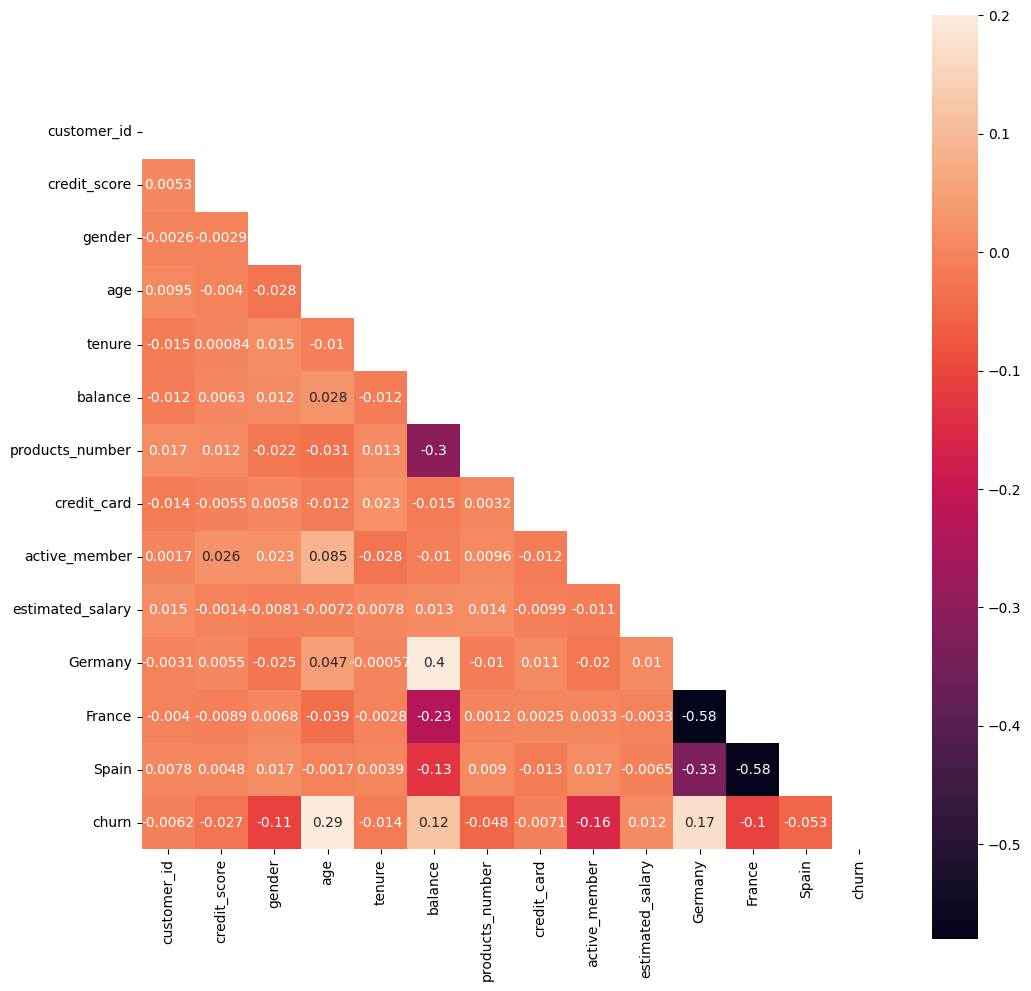

In [ ]:
train_corr = dfNum.corr(method = 'pearson')
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
corrHeat = sns.heatmap(train_corr, mask=mask, annot=True,vmax=.2, square=True)
corrHeat


Temuan ini adalah bahwa semua koefisien korelasi antara faktor-faktor dan hasil "churn" (berhenti menggunakan layanan) adalah rendah. Namun, dari semua faktor-faktor ini, lima faktor (gender, usia, saldo akun, status anggota aktif, negara) menunjukkan korelasi yang relatif kuat dengan hasil "churn."

Ini berarti bahwa, meskipun korelasinya tidak sangat tinggi, faktor-faktor tersebut masih memiliki pengaruh yang lebih signifikan terhadap keputusan pelanggan untuk berhenti menggunakan layanan. Dengan kata lain, gender, usia, saldo akun, status anggota aktif, dan negara memiliki hubungan yang lebih terlihat dengan hasil "churn" dibandingkan dengan faktor-faktor lainnya. Oleh karena itu, mereka mungkin merupakan area yang perlu diperhatikan dalam upaya untuk mengurangi tingkat "churn" dan mempertahankan pelanggan.



**Featur Analysis:**

**gender, age, balance, activate_member & country**<br>
untuk di analisa

# **EDA & Visualization**

**Churn Analysis**

In [ ]:
import plotly.express as px
label = 'Retained', 'Churn'
passed_failed = data["churn"].value_counts()
values = passed_failed.values
labels = passed_failed.index

fig = px.pie(names=label, values=values, title="Churn Analysis", color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0], textfont_size=15)
fig.update_layout(legend_title_text='Status', legend=dict(title=dict(text='Status')))

fig.show()

**Pie Chart** menunjukkan proporsi jumlah customer yang churn dan retained. dari total 10.000 customer, sebanyak 20.4% (2.040 customer) merupakan churn, sedangkan 79,6% (7.960 customer) merupakan retained.

Hal ini menunjukkan bahwa mayoritas customer masih bertahan menggunakan layanan bank. Namun bank tetap perlu memperhatikan masalah churn agar tidak semakin tinggi. Dengan memahami alasan churn, bank dapat mengambil tindakan yang tepat untuk mempertahankan lebih banyak customer.

**Country vs Churn Analysis**

In [ ]:
by_country = data.groupby(['country'])['churn'].value_counts(normalize=True).rename('ratio').reset_index()

# Urutkan DataFrame berdasarkan 'country'
by_country = by_country.sort_values('country')

In [ ]:
by_country

,country,churn,ratio
0,France,0,0.838452
1,France,1,0.161548
2,Germany,0,0.675568
3,Germany,1,0.324432
4,Spain,0,0.833266
5,Spain,1,0.166734


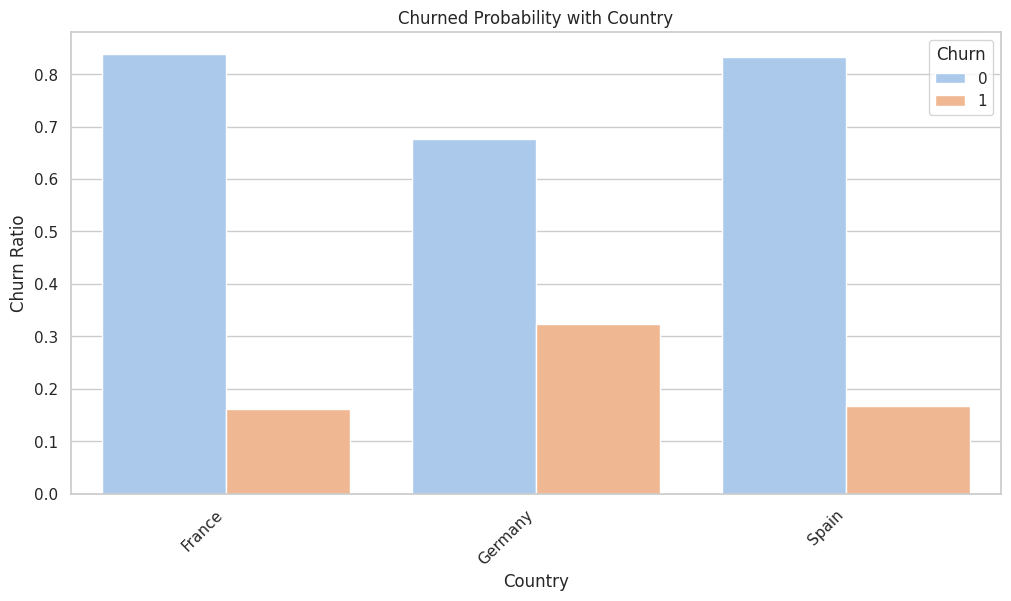

In [ ]:
sns.set_theme(style="whitegrid", palette='pastel')

plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
ax = sns.barplot(x='country', y='ratio', hue='churn', data=by_country)
plt.title('Churned Probability with Country')

# Mengatur label pada sumbu x agar lebih mudah dibaca
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Country')
plt.ylabel('Churn Ratio')
plt.legend(title='Churn', loc='upper right')

plt.show()

Berdasarkan country, ratio churn terbesar terjadi untuk negara Germany sebesar 0.324432, diikuti oleh Spain dan France sebesar 0.166734 dan 0.161548.

**gender vs churn Analysis**

In [ ]:
by_gender = data.groupby(['gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('gender')
by_gender

,gender,churn,ratio
0,Female,0,0.749285
1,Female,1,0.250715
2,Male,0,0.835441
3,Male,1,0.164559


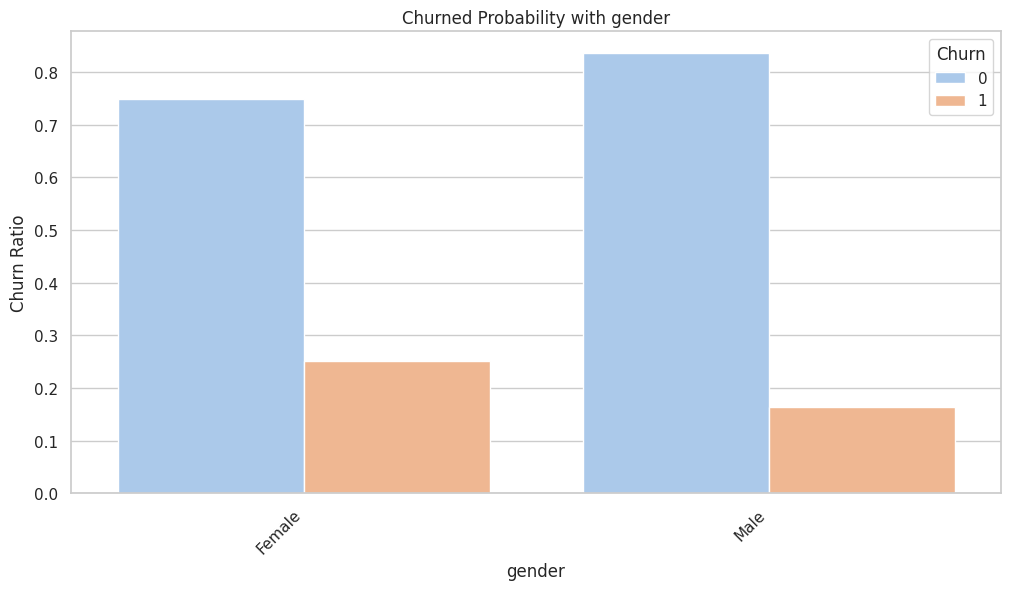

In [ ]:
sns.set_theme(style="whitegrid", palette='pastel')

plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
ax = sns.barplot(x='gender', y='ratio', hue='churn', data=by_gender)
plt.title('Churned Probability with gender')

# Mengatur label pada sumbu x agar lebih mudah dibaca
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('gender')
plt.ylabel('Churn Ratio')
plt.legend(title='Churn', loc='upper right')

plt.show()

Berdasarkan gender, ratio churn terbesar terjadi pada Female sebesar 0.250715,Perubahan dalam prioritas atau kebutuhan pelanggan Female dapat memengaruhi keputusan mereka untuk berhenti menggunakan layanan atau produk tertentu.

**Churned Probability with Country and Gender** dapat diartikan sebagai analisis yang mencoba memahami seberapa besar kemungkinan pelanggan akan berhenti menggunakan layanan atau produk tertentu, dengan mempertimbangkan faktor-faktor seperti negara asal pelanggan dan jenis kelamin pelanggan.

In [ ]:
by_gender_country =data.groupby(['gender', 'country'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('gender')

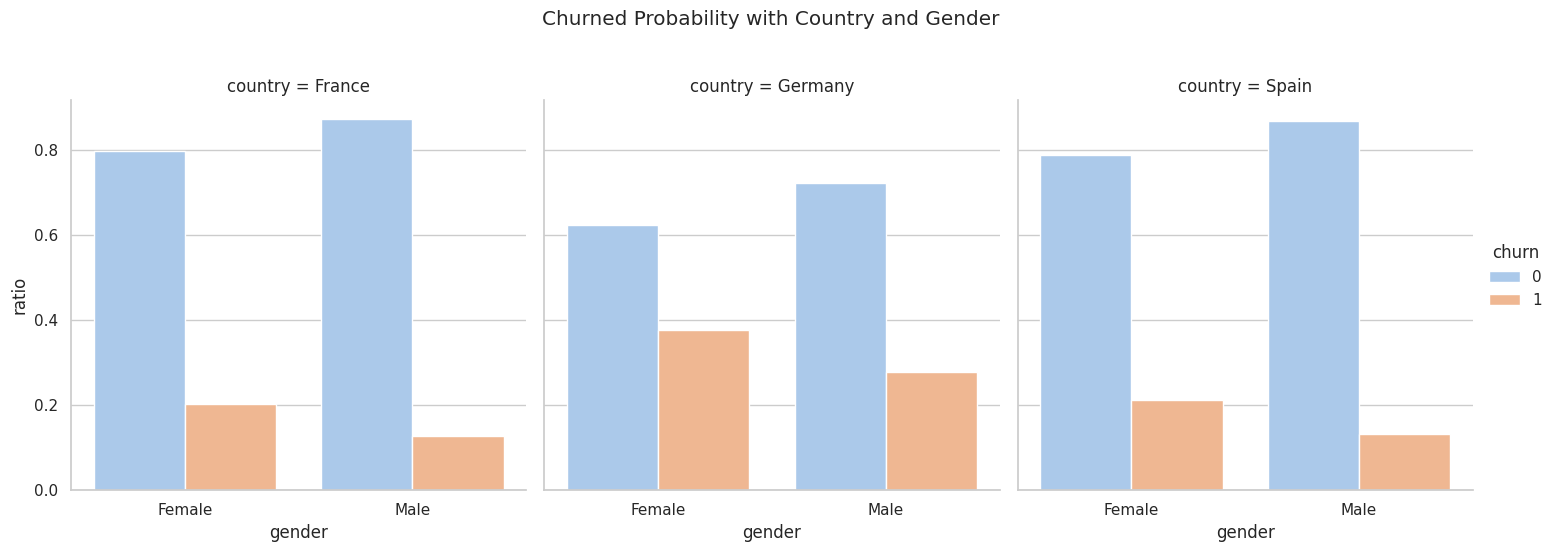

In [ ]:

sns.set_theme(style="whitegrid", palette="pastel")
g = sns.catplot(x='gender', y='ratio', hue='churn', col='country', kind='bar', data=by_gender_country)
g.fig.suptitle('Churned Probability with Country and Gender', y=1.10)

plt.show()

* Perempuan Jerman: Tingkat churn untuk perempuan Jerman adalah 6:4. Ini berarti, dari setiap 10 perempuan Jerman, 6 tetap menggunakan layanan atau produk, sedangkan 4 memutuskan untuk berhenti menggunakan layanan atau produk.<br>
* Laki-laki Jerman: Untuk laki-laki Jerman, tingkat churn adalah 7:3. Ini menunjukkan bahwa dari setiap 10 laki-laki Jerman, 7 tetap sebagai pelanggan, sedangkan 3 memilih untuk berhenti menggunakan layanan atau produk.<br>
* Perempuan France: Tingkat churn untuk perempuan France adalah 8:2. Ini berarti, dari setiap 10 perempuan France, 8 tetap menggunakan layanan atau produk, sedangkan 2 memutuskan untuk berhenti menggunakan layanan atau produk.<br>
* Laki-laki France: Untuk laki-laki France, tingkat churn adalah 9:1. Ini menunjukkan bahwa dari setiap 10 laki-laki France, 9 tetap sebagai pelanggan, sedangkan 1 memilih untuk berhenti menggunakan layanan atau produk.<br>
* Perempuan Spain: Tingkat churn untuk perempuan Spain adalah 8:2. Ini berarti, dari setiap 10 perempuan Spain, 8 tetap menggunakan layanan atau produk, sedangkan 2 memutuskan untuk berhenti menggunakan layanan atau produk.<br>
* Laki-laki Spain: Untuk laki-laki Spain, tingkat churn adalah 9:1. Ini menunjukkan bahwa dari setiap 10 laki-laki Spain, 9 tetap sebagai pelanggan, sedangkan 1 memilih untuk berhenti menggunakan layanan atau produk. Hampir sama seperti tingkat churn pada negara France.


**Customer age distribution vs churn**

In [ ]:
by_age = data.groupby(['age'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('age')
by_age

,age,churn,ratio
0,18,0,0.909091
1,18,1,0.090909
2,19,0,0.962963
3,19,1,0.037037
4,20,0,0.950000
...,...,...,...
123,84,0,0.500000
124,84,1,0.500000
125,85,0,1.000000
126,88,0,1.000000


In [ ]:
#Number of customers by Geography and Age Group:


age_bins = [17, 20, 30, 40, 50, 60, 70]
age_labels = ['18-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Gunakan pd.cut() untuk membagi data usia ke dalam grup usia yang sesuai
data['Age Group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)


# Aggregate number of customers by geography and age group
No_of_customers_geo_age = data.groupby(['churn','Age Group']).size().reset_index(name='Number of Customers')

# Sort the aggregated data by the number of customers in ascending order
No_of_customers_geo_age_sorted = No_of_customers_geo_age.sort_values(by='Number of Customers', ascending=False).reset_index()


In [ ]:
No_of_customers_geo_age_sorted

,index,churn,Age Group,Number of Customers
0,2,0,31-40,3913
1,1,0,21-30,1736
2,3,0,41-50,1532
3,9,1,41-50,788
4,8,1,31-40,538
5,10,1,51-60,448
6,4,0,51-60,349
7,5,0,61+,227
8,7,1,21-30,143
9,11,1,61+,104


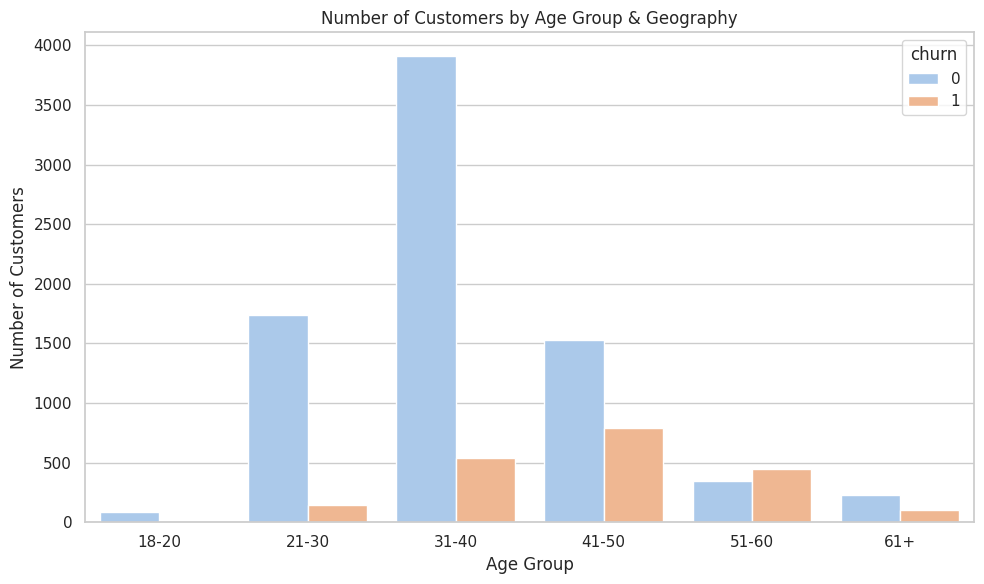

In [ ]:
# Create the grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=No_of_customers_geo_age,x='Age Group', y='Number of Customers', hue='churn')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group & Geography')

plt.tight_layout()
plt.show()

In [ ]:
hasil=No_of_customers_geo_age_sorted[No_of_customers_geo_age_sorted['churn']==1]
hasil.groupby('Age Group')['Number of Customers'].max().sort_values(ascending=False).reset_index()


,Age Group,Number of Customers
0,41-50,788
1,31-40,538
2,51-60,448
3,21-30,143
4,61+,104
5,18-20,5


 Insight: <br>menunjukkan bahwa orang-orang di rentang usia 41 hingga 50 tahun memiliki kemungkinan lebih tinggi untuk berhenti menggunakan layanan. Pada usia ini, banyak orang menghadapi beban keuangan yang lebih besar, seperti membeli rumah, pendidikan anak, dan persiapan pensiun. Ini dapat mengubah prioritas keuangan mereka dan membuat mereka mengurangi pengeluaran yang tidak penting, termasuk langganan layanan.

**balance vs churn**

In [ ]:
# Definisikan batasan rentang nilai untuk 'balance'
bins = [0, 50000, 100000, 150000, 200000, 250000]

# Buat label yang sesuai dengan jumlah batas
labels = ['Saldo 0-50000', 'Saldo 50001-100000', 'Saldo 100001-150000', 'Saldo 150001-200000', 'Saldo 200001+']

# Gunakan pd.cut untuk mengelompokkan data berdasarkan rentang nilai 'balance'
data['balance_range'] = pd.cut(data['balance'], bins=bins, labels=labels)

# Hitung proporsi 'churn' dalam setiap kelompok 'balance_range'
by_balance = data.groupby(['balance_range'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index()

# Mengubah nama kolom menjadi huruf kapital
by_balance.columns = by_balance.columns.str.upper()

# Menampilkan tabel dengan nama kolom huruf kapital
by_balance


,BALANCE_RANGE,CHURN,RATIO
0,Saldo 0-50000,0,0.653333
1,Saldo 0-50000,1,0.346667
2,Saldo 50001-100000,0,0.801193
3,Saldo 50001-100000,1,0.198807
4,Saldo 100001-150000,0,0.742298
5,Saldo 100001-150000,1,0.257702
6,Saldo 150001-200000,0,0.780749
7,Saldo 150001-200000,1,0.219251
8,Saldo 200001+,1,0.545455
9,Saldo 200001+,0,0.454545


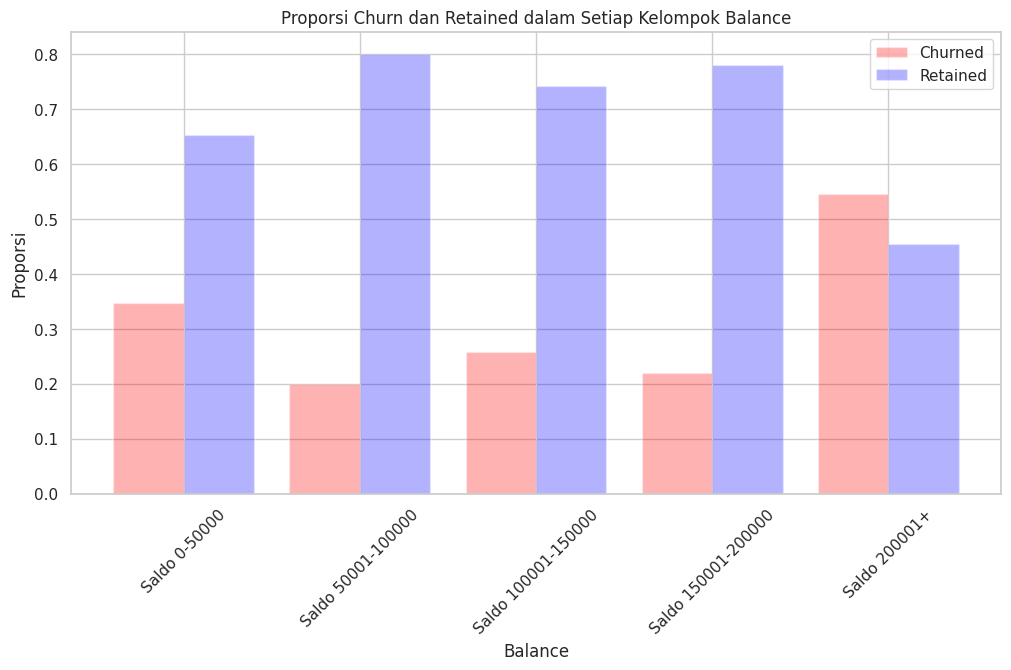

In [ ]:
# Filter data untuk churn = 1 dan churn = 0
churned_data = by_balance[by_balance['CHURN'] == 1]
retained_data = by_balance[by_balance['CHURN'] == 0]

# Mengambil label dan proporsi churn untuk kedua kelompok
balance_labels = churned_data['BALANCE_RANGE']
churn_ratios = churned_data['RATIO']
retained_ratios = retained_data['RATIO']

# Membuat grafik batang
width = 0.4  # Lebar setiap batang
x = range(len(balance_labels))  # Posisi sumbu x

plt.figure(figsize=(12, 6))
plt.bar(x, churn_ratios, width, label='Churned', color='red', alpha=0.3)
plt.bar([i + width for i in x], retained_ratios, width, label='Retained', color='blue', alpha=0.3)

plt.xlabel('Balance')
plt.ylabel('Proporsi')
plt.title('Proporsi Churn dan Retained dalam Setiap Kelompok Balance')
plt.xticks([i + width / 2 for i in x], balance_labels, rotation=45)
plt.legend()
plt.show()

Berdasarkan grafik diatas terlihat bahwa churn terbesar terjadi pada kelompok saldo > 200,001 dengan proporsi 55% dan churn terkecil terjadi pada kelompok saldo antara 50,001 - 100,000 dengan proporsi 20%.

**balance = 0 with age vs churn**

<ipython-input-36-5226b42a4051>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-36-5226b42a4051>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-36-5226b42a4051>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

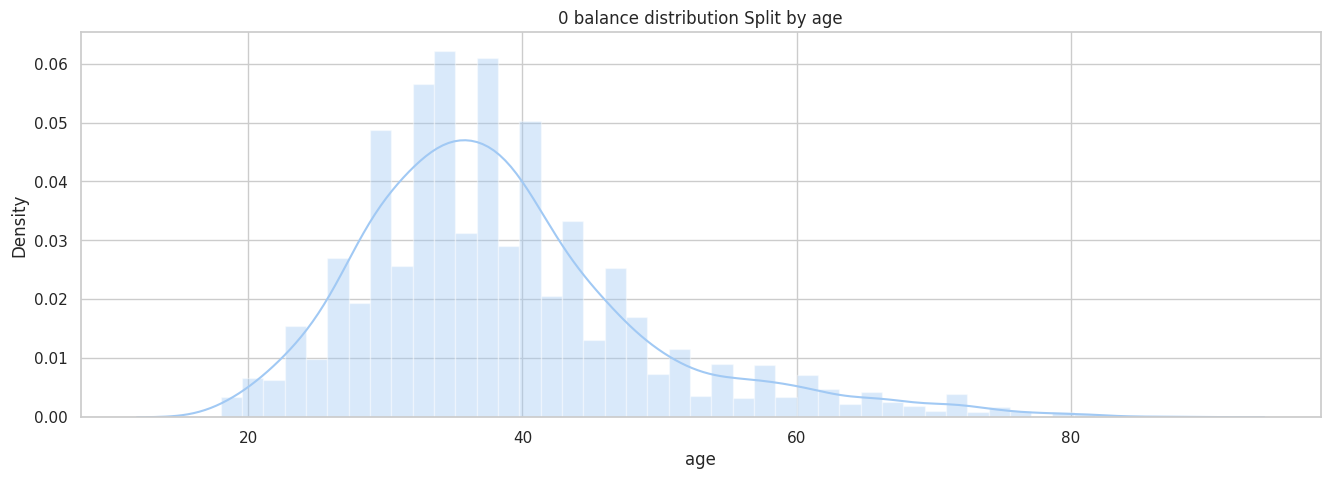

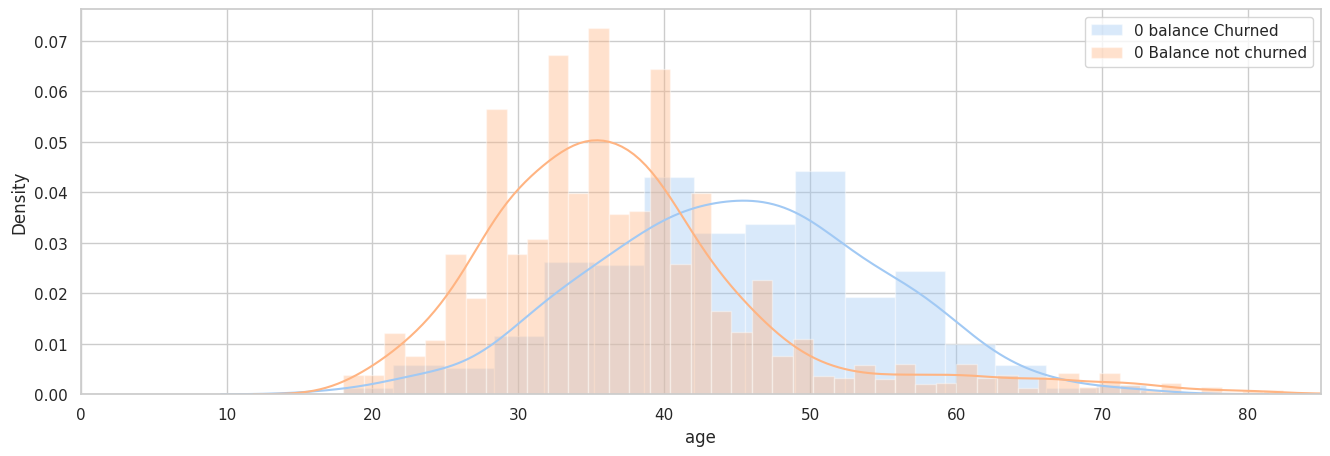

In [ ]:
plt.figure(figsize=(16,5))
plt.title('0 balance distribution Split by age')
sns.distplot(data[(data['balance'] == 0)]['age'], label='0balance with age dist')


plt.figure(figsize=(16,5))
sns.distplot(data[(data['churn'] == 1)& (data['balance'] == 0)]['age'], label='0 balance Churned').set(xlim=(0))
sns.distplot(data[(data['churn'] == 0)& (data['balance'] == 0)]['age'], label='0 Balance not churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()

**balance > 0 with age vs churn**

<ipython-input-37-a00f31365d6d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-37-a00f31365d6d>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-37-a00f31365d6d>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

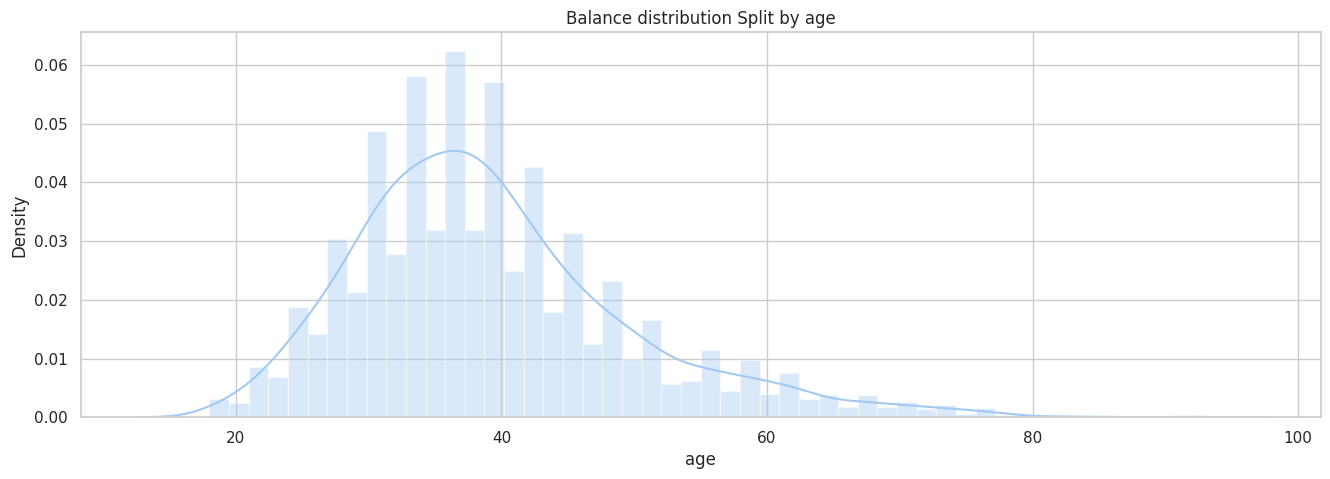

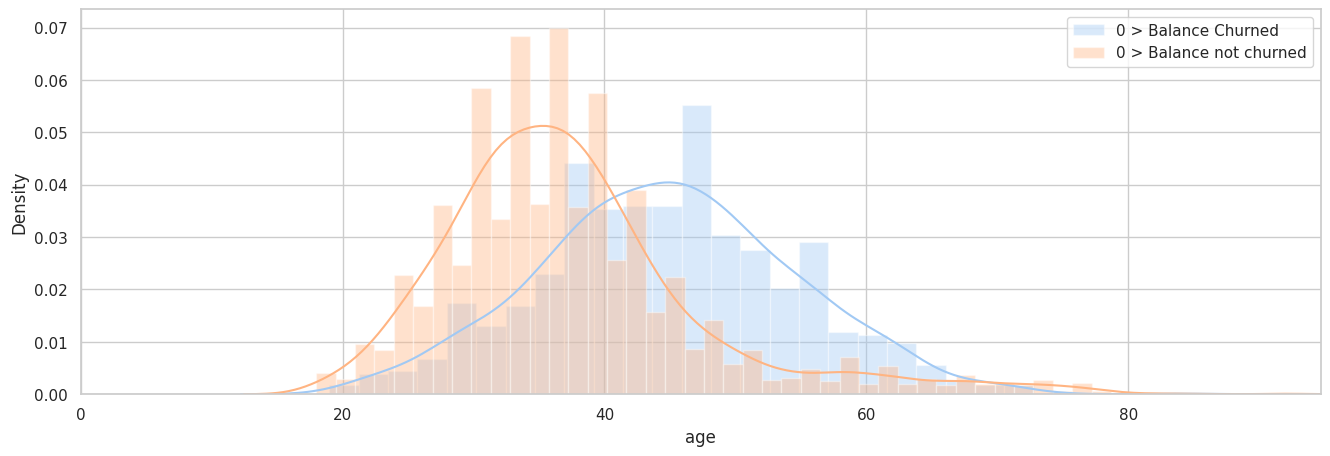

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Balance distribution Split by age')
sns.distplot(data[(data['balance'] > 0)]['age'], label='Balance with age dist')

plt.figure(figsize=(16,5))
sns.distplot(data[(data['churn'] == 1)& (data['balance'] > 0)]['age'], label='0 > Balance Churned').set(xlim=(0))
sns.distplot(data[(data['churn'] == 0)& (data['balance'] > 0)]['age'], label='0 > Balance not churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()

Insight:<br>
* saldo nol atau lebih dari nol, pelanggan yang berhenti ("churn") cenderung berusia sekitar 48 tahun.

  Mereka yang memiliki saldo lebih dari nol dan berhenti cenderung berusia sekitar 45 tahun dan memiliki saldo sekitar 125.000

**active member vs churn**

In [ ]:
by_active_member = data.groupby(['active_member'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('active_member')
by_active_member

,active_member,churn,ratio
0,0,0,0.731491
1,0,1,0.268509
2,1,0,0.857309
3,1,1,0.142691


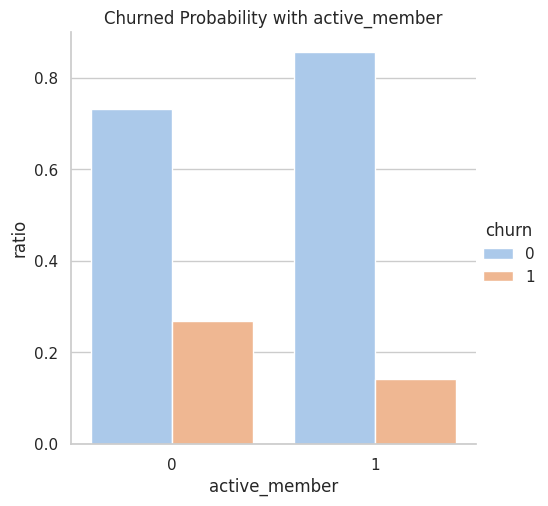

In [ ]:
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='active_member',y='ratio', hue='churn',  kind='bar', data=by_active_member).set(title = 'Churned Probability with active_member')

Temuan ini menunjukkan bahwa orang yang bukan pengguna aktif memiliki kemungkinan lebih besar untuk berhenti menggunakan layanan ("churn"). Artinya, mereka yang tidak aktif dalam menggunakan layanan cenderung meninggalkannya.

# Model Machine Learning

**Menggunakan dfNum karena sudah diencoded**

In [ ]:
dfNum

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Germany,France,Spain,churn
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,0,1,0,1
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,0,1,0,1
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,0,1,0,1
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0,0,1


In [ ]:
dfNum.dtypes

customer_id           int64
credit_score          int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
Germany               int64
France                int64
Spain                 int64
churn                 int64
dtype: object

In [ ]:
dfNum.nunique()

customer_id         10000
credit_score          460
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
Germany                 2
France                  2
Spain                   2
churn                   2
dtype: int64

In [ ]:
#Memisahkan dataset dependent dan independent variables

#deklarasi response variable:

response = dfNum["churn"]

dfNum = dfNum.drop(columns="churn")

In [ ]:
dfNum

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Germany,France,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,0,1,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,0,1,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,0,1,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0,0


In [ ]:
#Membuat data set training dan test dari dependent dan independent variables


X_train, X_test, y_train, y_test = train_test_split(dfNum, response,
                                                    stratify=response,
                                                    test_size = 0.2,
                                                    random_state = 0)


print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 13)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 13)
Number transactions y_test dataset:  (2000,)


In [ ]:
#x_test_df = pd.Dataframe(data=X_test, columns=['customer_id', 'credit_score','gender','age','tenure','balance','product_number','credit_card','active_member','estimated_salary','Germany','France','Spain'])  # Sesuaikan dengan nama kolom fitur Anda
#y_test_df = pd.Dataframe(data=y_test, columns=['Churn'])  # Sesuaikan dengan nama kolom label Anda

#x_test_df.to_csv('x_test.csv', index=False)
#y_test_df.to_csv('y_test.csv', index=False)

In [ ]:
# Remove Identifiers (Kolom customer_id)

train_identity = X_train['customer_id']
X_train = X_train.drop(columns = ['customer_id'])

test_identity = X_test['customer_id']
X_test = X_test.drop(columns = ['customer_id'])

In [ ]:
# Melakukan scalling (Standarisasi) pada feature

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
#Bandingkan Algoritma Klasifikasi - Iterasi Pertama
#Bandingkan Accuracy and ROC AUC Mean Metrics

models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear',
                                                         random_state = 0,
                                                         class_weight='balanced')
))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluasi Hasil Tiap Model :


acc_results = []
auc_results = []
names = []
# set table untuk hasil performa tiap model
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluasi tiap model menggunakan k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,85.72,1.92,86.12,0.87
0,Logistic Regression,76.97,1.85,71.38,1.72
1,Decision Tree Classifier,68.78,1.26,79.71,0.98


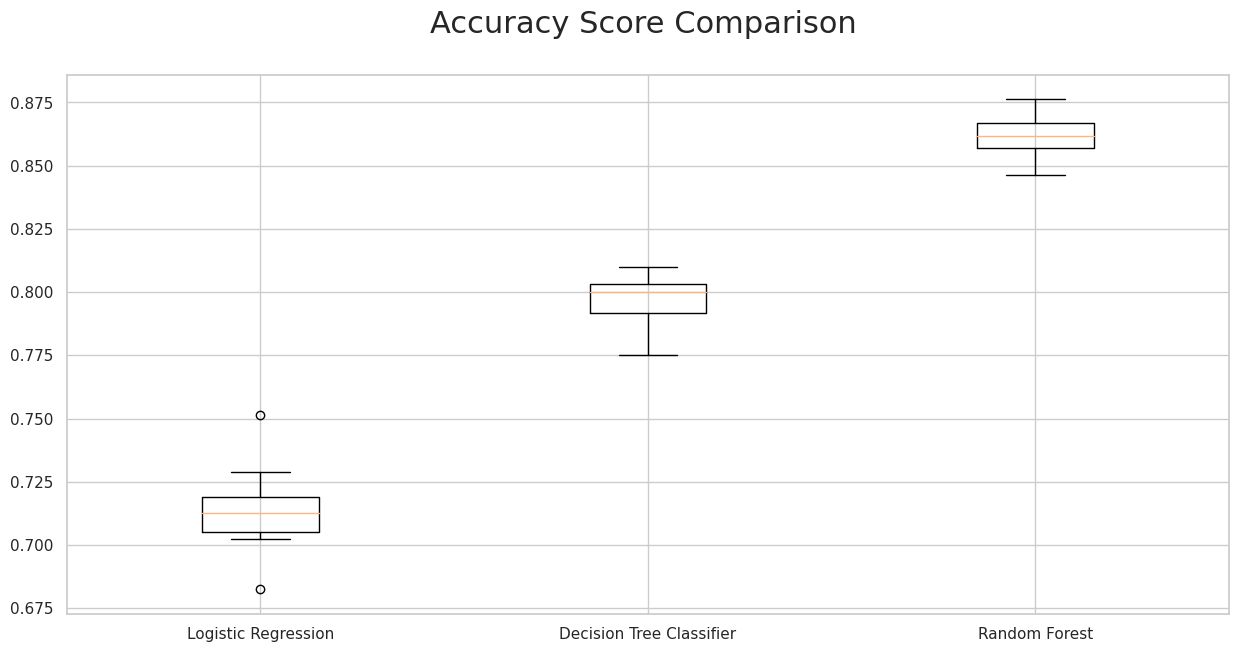

In [ ]:
#Visualisasi Perbandingan Akurasi Algoritma-----------------------------------

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

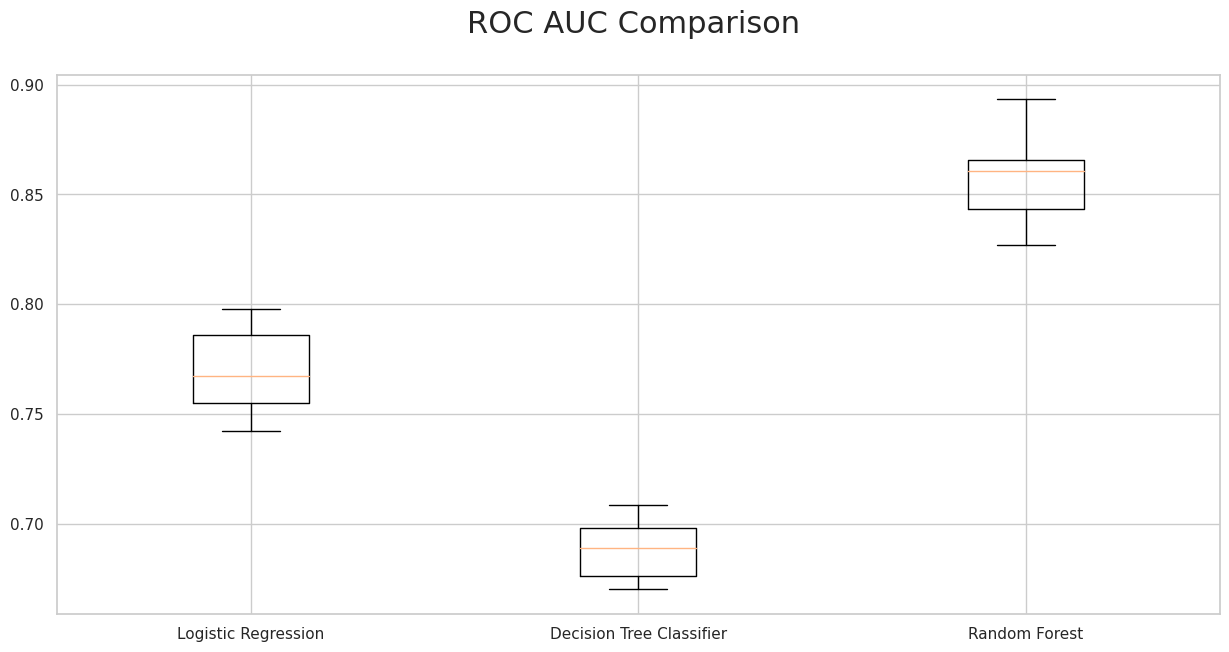

In [ ]:
#Visualisasi Perbandingan AUC-ROC dari tiap algoritma test :

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

In [ ]:
#Bandingkan Algoritma Klasifikasi - Iterasi Kedua-----------------------------
#Logistic Regression-----------------

# Fitting Logistic Regression terhadap Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Prediksi Test set results
y_pred = classifier.predict(X_test)

#Evaluasi results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

#Decision Tree---------------------------------------------
# Fitting Decision Tree terhadap Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Prediksi Test set results
y_pred = classifier.predict(X_test)

#Evaluasi results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)


#Random Forest--------------------------------------------
# Fitting Random Forest terhadap Training set:

classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Prediksi Test set results
y_pred = classifier.predict(X_test)

#Evaluasi results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)

<ipython-input-52-95f0f3814c18>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-52-95f0f3814c18>:69: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)


print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
2        Random Forest    0.8625   0.768293  0.464373  0.578867  0.504269   
0  Logistic Regression    0.8090   0.582781  0.216216  0.315412  0.247330   
1        Decision Tree    0.8075   0.527500  0.518428  0.522924  0.520217   

    ROC-AUC  
2  0.714296  
0  0.588334  
1  0.699892  


In [ ]:
#Train pada Data Test dan Evaluasi Model Pilihan


# Fit Random Forest terhadap Training dataset:

classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)


# Prediksi Test set results

y_pred = classifier.predict(X_test)

In [ ]:
y_test.value_counts()

0    1593
1     407
Name: churn, dtype: int64

In [ ]:
pd.DataFrame(y_pred)[0].value_counts()

0    1762
1     238
Name: 0, dtype: int64

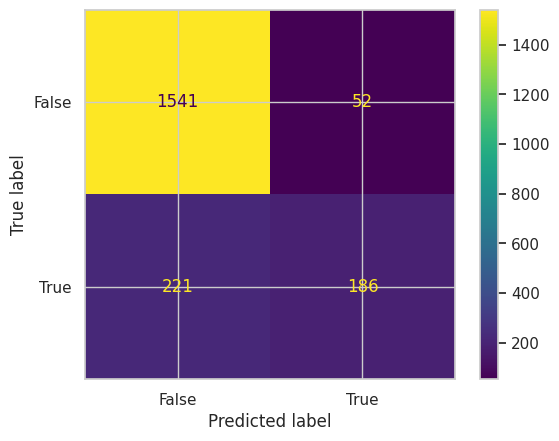

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()


In [ ]:
#Evaluasi Model pilihan terhadap  Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC '])

print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score  ROC AUC 
0  Random Forest    0.8635   0.781513  0.457002  0.576744  0.498392   0.71218


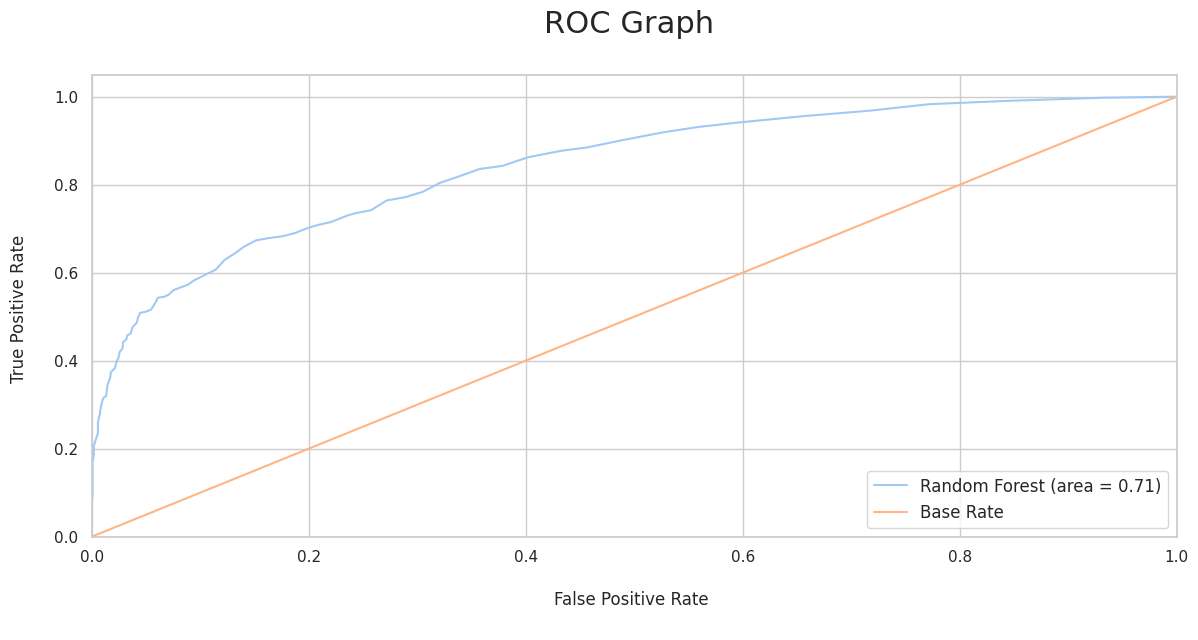

In [ ]:
# Evaluasi model dengan ROC Graph

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = roc_auc_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Random Forest
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

In [ ]:
import pickle

# Assuming you have already trained your classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Define the filename for saving the model
model_filename = 'random_forest_classifier.pkl'

# Save the trained classifier to a file
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)

print(f"Random Forest classifier saved as '{model_filename}'")

Random Forest classifier saved as 'random_forest_classifier.pkl'


# Coba prediksi data baru

In [ ]:
model = classifier.fit(X_train, y_train)

In [ ]:
model


RandomForestClassifier(random_state=0)

In [ ]:
data.head(4)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age Group,balance_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50,NaN
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50,Saldo 50001-100000
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50,Saldo 150001-200000
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40,NaN


In [ ]:

# Define your new data as a DataFrame
data_baru = pd.DataFrame({
    'customer_id': [15634602],
    'credit_score': [619],
    'gender': ['Female'],
    'age': [42],
    'tenure': [2],
    'balance': [0.00],
    'products_number': [1],
    'credit_card': [1],
    'active_member': [1],
    'estimated_salary': [101348.88],
    'France': [1],
    'Germany': [0],
    'Spain': [0]
})



In [ ]:
data_baru

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Spain
0,15634602,619,Female,42,2,0.0,1,1,1,101348.88,1,0,0


In [ ]:
data_baru.dtypes

customer_id           int64
credit_score          int64
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
France                int64
Germany               int64
Spain                 int64
dtype: object

In [ ]:
data.dtypes

customer_id            int64
credit_score           int64
country             category
gender              category
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
churn                  int64
Age Group           category
balance_range       category
dtype: object

In [ ]:
# List kolom-kolom yang ingin diubah menjadi tipe data kategori
columns_to_change2 = ["gender"]

# Menggunakan metode astype untuk mengubah tipe data kolom-kolom tersebut menjadi kategori
data_baru[columns_to_change2] = data_baru[columns_to_change2].astype("category")


In [ ]:
data_baru.dtypes

customer_id            int64
credit_score           int64
gender              category
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
France                 int64
Germany                int64
Spain                  int64
dtype: object

In [ ]:
category_mappings = {
    "gender": {"Male": 1, "Female": 0}}
data_baru.replace(category_mappings, inplace=True)

In [ ]:
identitas = data['customer_id']
data_baru= data_baru.drop('customer_id', axis =1)


In [ ]:
data_baru

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Spain
0,619,0,42,2,0.0,1,1,1,101348.88,1,0,0


In [ ]:
data_baru = data_baru[X_train.columns]

# Scale the new data using the same scaler used for training
scaler = StandardScaler()

# Fit the scaler on the training data (X_train) before transforming
scaler.fit(X_train)

# Transform the new data (data_baru) using the fitted scaler
scaled_data_baru = scaler.transform(data_baru)

# Make predictions using the trained logistic regression classifier
hasil = model.predict(scaled_data_baru)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:

for pred in hasil:
    if pred ==1:
        print('Customer : Churn')
    else:
        print('Customer : Retained')

Customer : Retained
